# Autoencoder Totalmente Conectado

Con el fin de mantener las tradiciones de deep learning, usaremos el conjunto de datos MNIST para implementar la versión más sencilla de un autoencoder.

Al pasar las imágenes por el autoencoder, terminaremos con una versión comprimida de las mismas.

Usaremos TensorFlow para esta tarea.

<img src="images/autoencoder_1.png">

## Preliminares

Empezaremos importando las librerias y dependencias necesarias.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Importando los Datos

Dada la enorme popularidad de MNIST, TensorFlow viene equipado con dicho conjunto de datos.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Ojeando los Datos

Echemos un vistazo a una de nuestras imágenes de ejemplo.

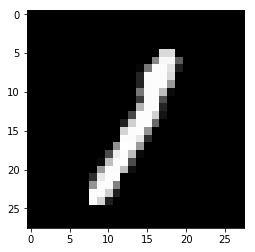

In [3]:
image_index = np.random.randint(len(mnist.train.images))
image = mnist.train.images[image_index]
plt.imshow(image.reshape((28, 28)), cmap='gray')

Para entener el autoencoder, aplanaremos estas imágenes en un vector de 784 elementos.

EL lado bueno de MNIST es que sus imágenes ya están normalizadas de manera tal que cada pixel está entre 0 y 1.

Puesto que nuestra meta es entender el funcionamiento de los autoencoders (en vez de construir un modelo vanguardista), crearemos uno con una sola capa oculta (_hidden layer_), la cual actuará como capa cuello de botella (_bottleneck layer_), a partir de la cual el decodificador empezará el proceso de reconstrucción de la imagen original.

<img src="images/simple_autoencoder.png">

In [4]:
encoding_size = 32

image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Hidden layer output
encoded = tf.layers.dense(inputs, encoding_size, activation=tf.nn.relu)

# Logits of the output layer
logits = tf.layers.dense(encoded, image_size, activation=None)

decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits)
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Entrenamiento

Entrenemos nuestra red. Dado que este es un problema de aprendizaje no supervisado, no le prestaremos atención a las etiquetas, sino únicamente a los ejemplos o instancias de entrenamiento.

In [5]:
session = tf.Session()

EPOCHS = 30
BATCH_SIZE = 64

session.run(tf.global_variables_initializer())

for epoch in range(EPOCHS):
    epoch_losses = []
    for _ in range(mnist.train.num_examples // BATCH_SIZE):
        batch = mnist.train.next_batch(BATCH_SIZE)
        feed = {inputs: batch[0], targets: batch[0]}
        batch_cost, _ = session.run([cost, optimizer], feed_dict=feed)
        epoch_losses.append(batch_cost)
        
    print(f'Epoch: {epoch + 1}/{EPOCHS}')
    print(f'Training loss: {np.mean(epoch_losses)}')

Epoch: 1/30
Training loss: 0.19085310399532318
Epoch: 2/30
Training loss: 0.11885757744312286
Epoch: 3/30
Training loss: 0.10321245342493057
Epoch: 4/30
Training loss: 0.09727531671524048
Epoch: 5/30
Training loss: 0.09539952129125595
Epoch: 6/30
Training loss: 0.09462495893239975
Epoch: 7/30
Training loss: 0.09424903243780136
Epoch: 8/30
Training loss: 0.09397470206022263
Epoch: 9/30
Training loss: 0.09377527236938477
Epoch: 10/30
Training loss: 0.09361094236373901
Epoch: 11/30
Training loss: 0.09350372105836868
Epoch: 12/30
Training loss: 0.09340003877878189
Epoch: 13/30
Training loss: 0.0933358296751976
Epoch: 14/30
Training loss: 0.09328215569257736
Epoch: 15/30
Training loss: 0.09323769807815552
Epoch: 16/30
Training loss: 0.09320786595344543
Epoch: 17/30
Training loss: 0.09312088787555695
Epoch: 18/30
Training loss: 0.09310293942689896
Epoch: 19/30
Training loss: 0.09310244768857956
Epoch: 20/30
Training loss: 0.09305239468812943
Epoch: 21/30
Training loss: 0.09304848313331604
Ep

## Resultados

Veamos algunas de las imagenes del conjunto de pruebas, junto con la reconstrucción hecha por el decodificador.

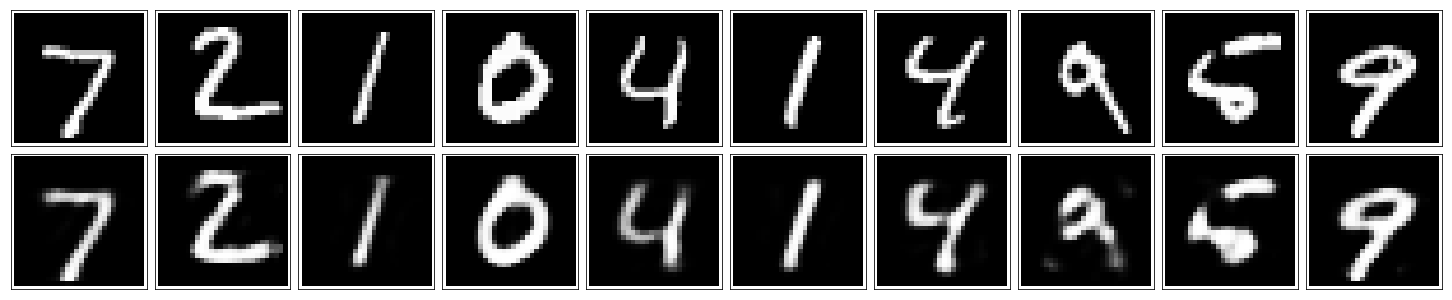

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))
in_images = mnist.test.images[:10]
reconstructed, compressed = session.run([decoded, encoded], feed_dict={inputs: in_images})

for images, row in zip([in_images, reconstructed], axes):
    for image, ax in zip(images, row):
        ax.imshow(image.reshape((28, 28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)

In [7]:
session.close()

Podemos ver que las imagenes reconstruidas lucen bastante bien, a pesar de algunas áreas un tanto borrosas.